## Import Models

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as ans
import numpy as np
import pandas as pd

## DATA COLLECTING AND ANALYSIS

In [2]:
## Loading The data Set
Df = pd.read_csv(r"C:\Users\smkon\Downloads\Project 2 - Diabetes Data-20230914T094115Z-001\Project 2 - Diabetes Data\Project 2 MeriSKILL\diabetes.csv")

In [3]:
Df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
## Number of rows and columns in dataset 
Df.shape

(768, 9)

In [5]:
## Getting The Statistical Messures of the data
Df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
Df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
Df.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)

In [8]:
Df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Checking for Missing data

In [9]:
Df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

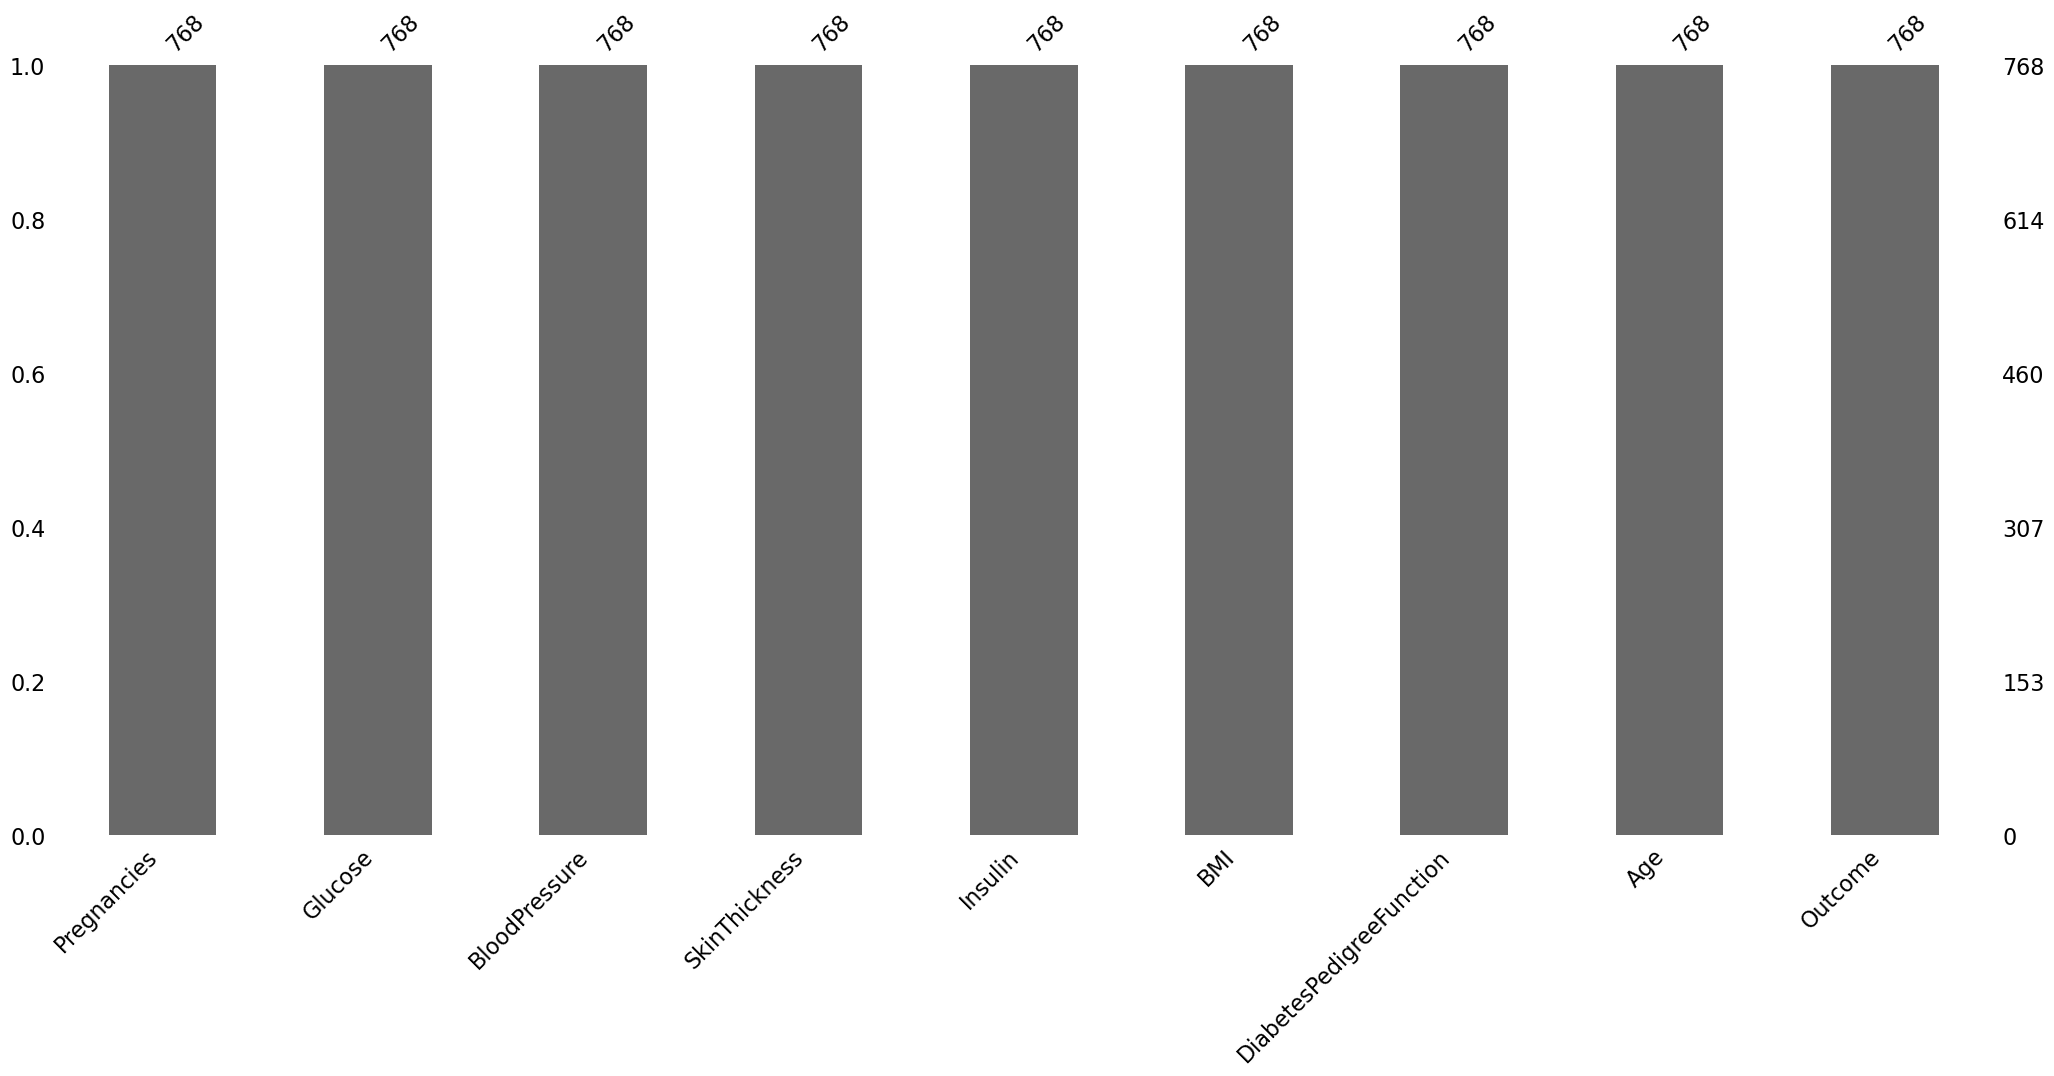

In [10]:
import missingno as msno
msno.bar(Df)

## Co-Relation Matrix

In [11]:
Corelation =Df.corr()
print(Corelation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<IPython.core.display.Javascript object>

<Axes: >

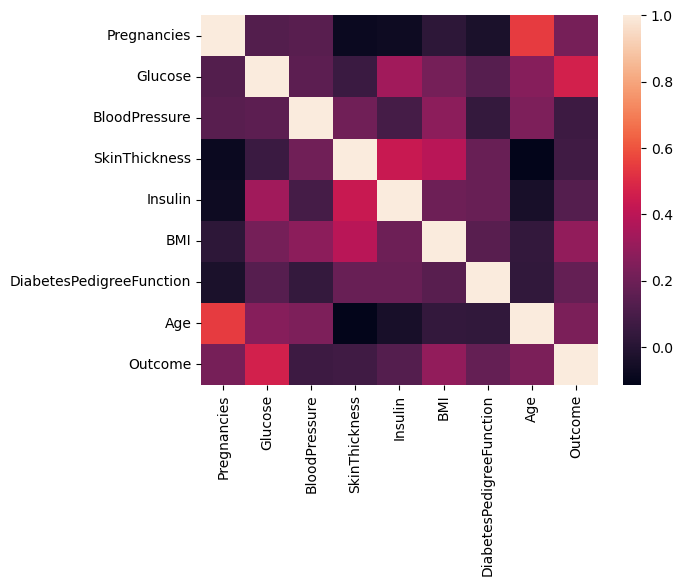

In [12]:
sns.heatmap(Corelation)

## Data Visualization

<IPython.core.display.Javascript object>

<Axes: xlabel='Outcome', ylabel='count'>

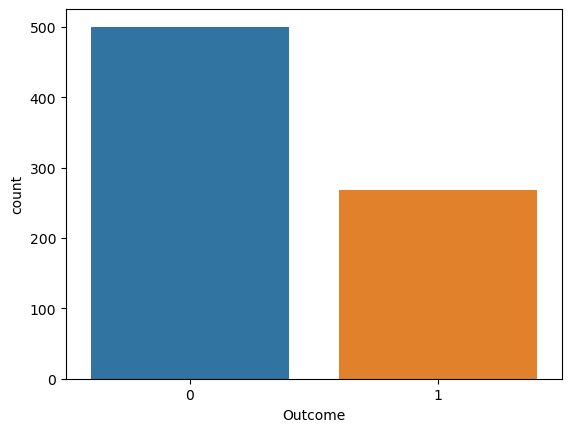

In [13]:
sns.countplot(x = 'Outcome',data = Df)

0    500
1    268
Name: Outcome, dtype: int64


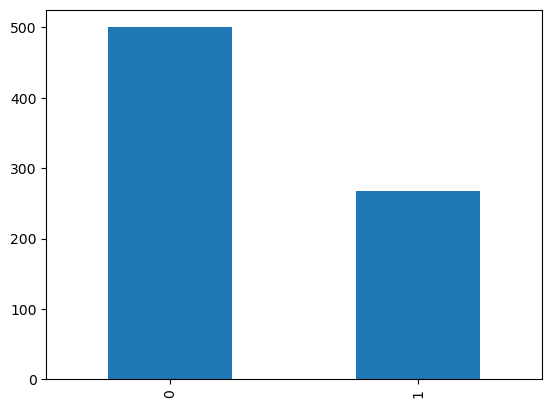

In [18]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = Df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(Df.Outcome.value_counts())
p=Df.Outcome.value_counts().plot(kind="bar")


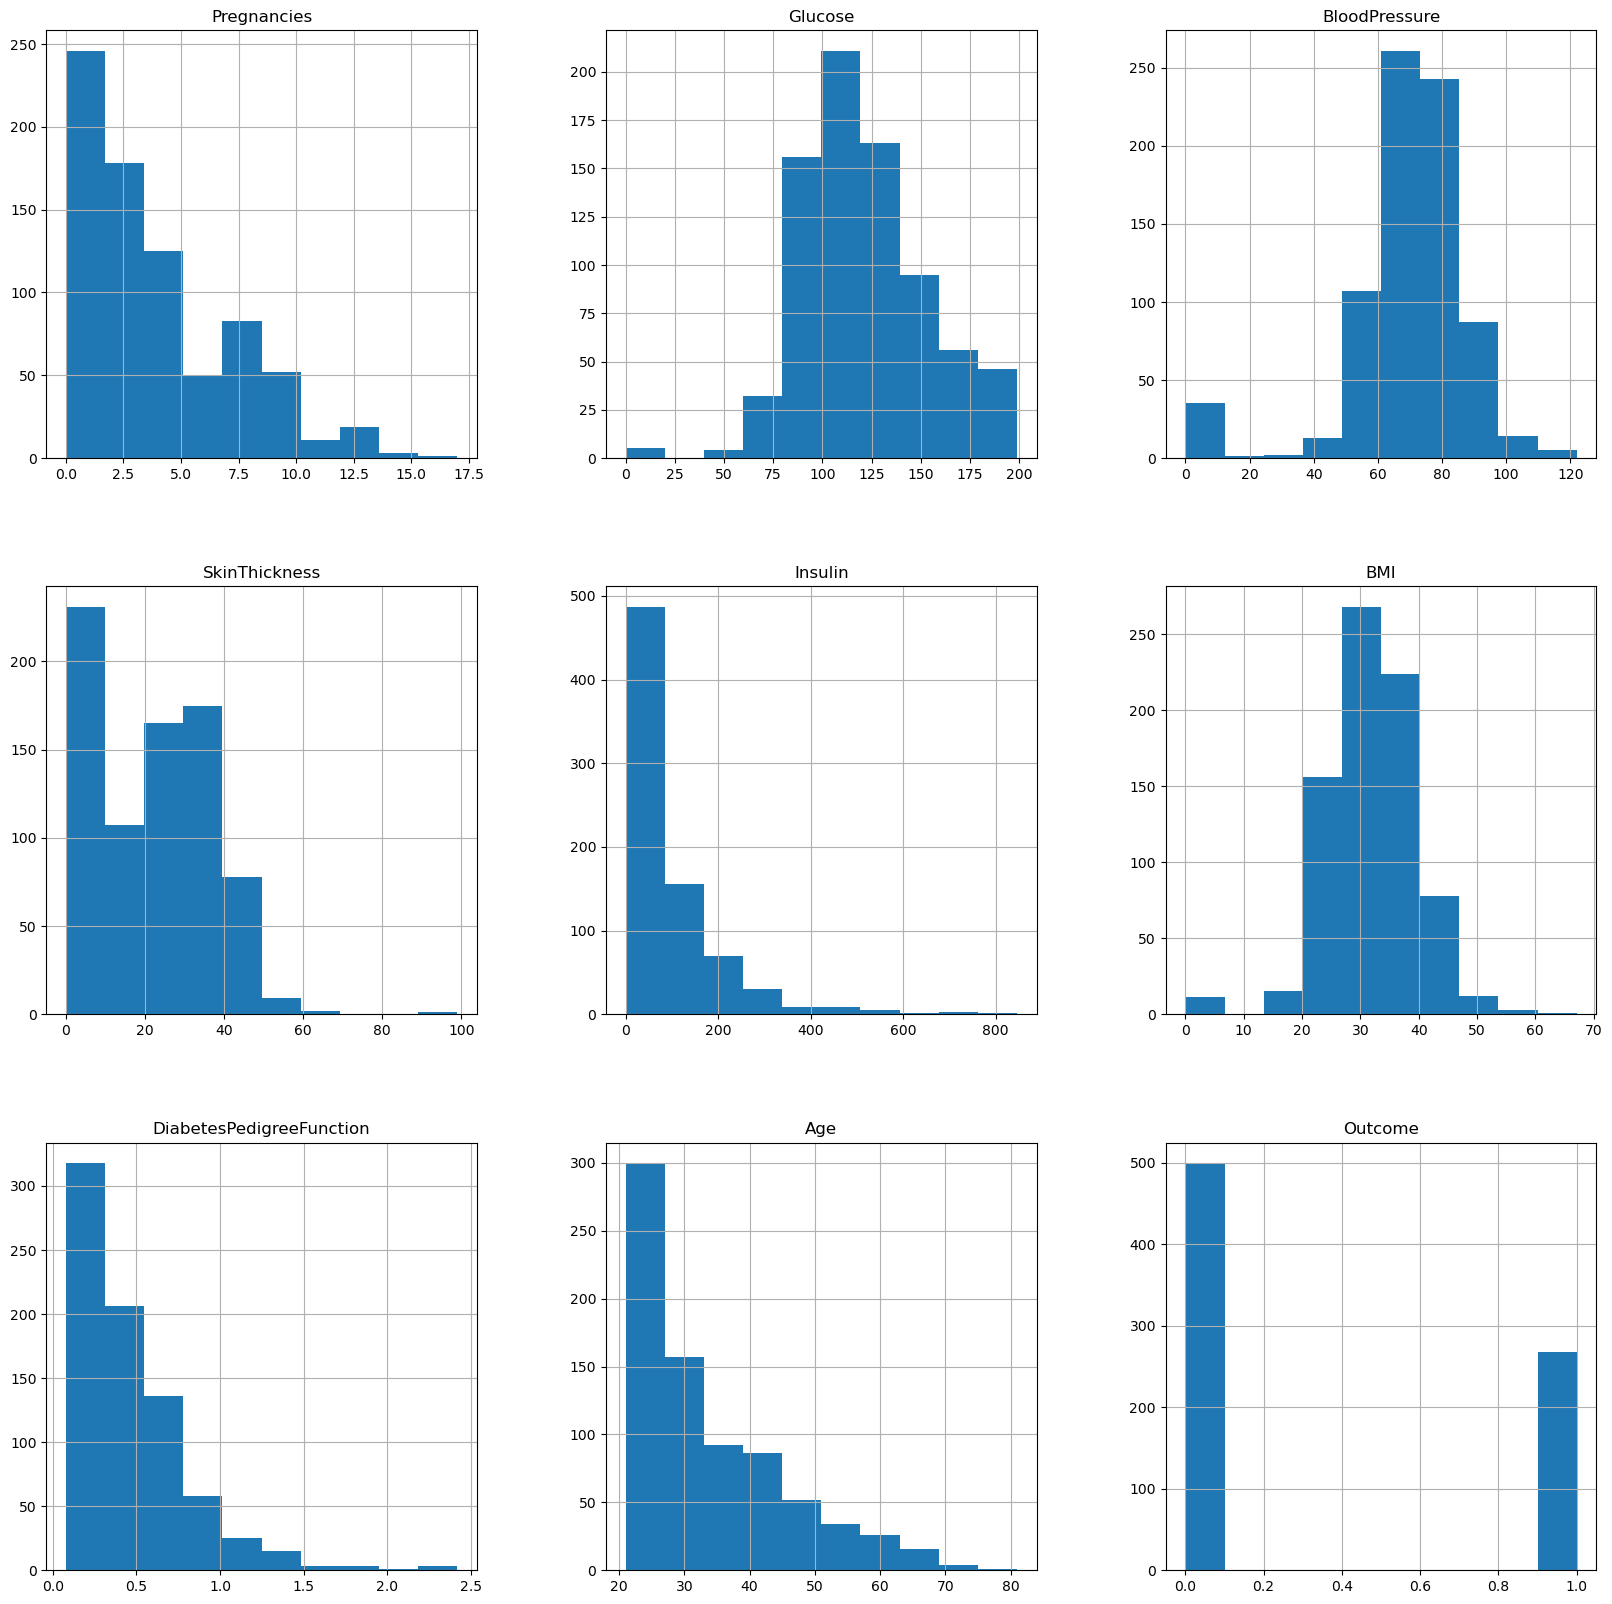

In [16]:
P= Df.hist(figsize = (20,20))

## Model Building

In [21]:
# Seperating Data and labels
X=Df.drop(columns="Outcome",axis=1)
Y=Df["Outcome"]
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2,random_state=2)

In [22]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
602,1,124,74,36,0,27.8,0.100,30
429,1,95,82,25,180,35.0,0.233,43
623,0,94,70,27,115,43.5,0.347,21
209,7,184,84,33,0,35.5,0.355,41
589,0,73,0,0,0,21.1,0.342,25
...,...,...,...,...,...,...,...,...
534,1,77,56,30,56,33.3,1.251,24
584,8,124,76,24,600,28.7,0.687,52
493,4,125,70,18,122,28.9,1.144,45
527,3,116,74,15,105,26.3,0.107,24


In [23]:
Y_train

602    0
429    1
623    0
209    1
589    0
      ..
534    0
584    1
493    1
527    0
168    0
Name: Outcome, Length: 614, dtype: int64

## Training The model

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
y_predict = model.predict(X_test)

C:\Users\smkon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Making Prediction

In [25]:
predictions=model.predict(X_test)
print(predictions)

[0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 1 0]


## EVALUATION

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predict)
cm

array([[96, 13],
       [23, 22]], dtype=int64)

<IPython.core.display.Javascript object>

<Axes: >

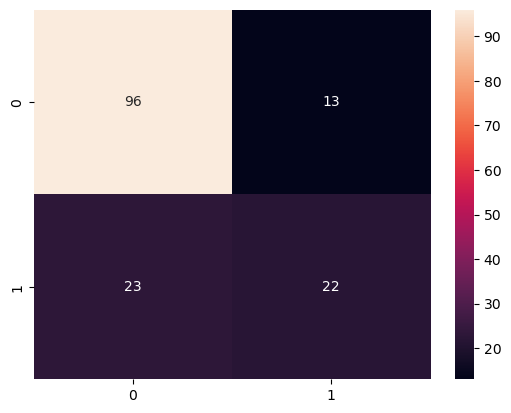

In [38]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [39]:
from sklearn.metrics import accuracy_score
accuracy =accuracy_score(Y_test, y_predict)
accuracy

0.7662337662337663

 ## Let's check whether the person have diabetes or not using some random values



In [41]:
y_predict = model.predict([[1,148,72,35,79.799,33.6,0.627,50]])
print(y_predict)
if y_predict==1:
    print("Diabetic")
else:
    print("Non Diabetic")

[1]
Diabetic


C:\Users\smkon\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
